### Customer Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
data = pd.read_csv("Customers.csv")
data.head(5)

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,4/8/1966,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,HUANG,HUANG,14/05/1965,NaN,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,NaN,NaN,15-02-1968
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,TORRES,TORRES,8/12/1965,NaN,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,NaN,NaN,NaN
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,ZHU,ZHU,15/02/1968,NaN,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,NaN,NaN,NaN
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,JOHNSON,JOHNSON,8/8/1968,NaN,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,NaN,NaN,NaN


In [2]:
data.dtypes

CustomerKey         int64
Prefix             object
FirstName          object
LastName           object
Unnamed: 4         object
Unnamed: 5         object
Unnamed: 6         object
BirthDate          object
Unnamed: 8        float64
MaritalStatus      object
Gender             object
EmailAddress       object
AnnualIncome       object
TotalChildren       int64
EducationLevel     object
Occupation         object
HomeOwner          object
Unnamed: 17       float64
Unnamed: 18       float64
BirthDate.1        object
dtype: object

In [3]:
data.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'BirthDate', 'Unnamed: 8', 'MaritalStatus',
       'Gender', 'EmailAddress', 'AnnualIncome', 'TotalChildren',
       'EducationLevel', 'Occupation', 'HomeOwner', 'Unnamed: 17',
       'Unnamed: 18', 'BirthDate.1'],
      dtype='object')

In [4]:
#Dropping some irrelevant columns
data.head(1)

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,Unnamed: 5,Unnamed: 6,BirthDate,Unnamed: 8,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Unnamed: 17,Unnamed: 18,BirthDate.1
0,11000,MR.,JON,YANG,MR. JON YANG,YANG,YANG,4/8/1966,NaN,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,NaN,NaN,14-05-1965


In [5]:
data.drop(["Unnamed: 5", "Unnamed: 6", "Unnamed: 8", "Unnamed: 17", "Unnamed: 18", "BirthDate.1" ], axis=1, inplace=True)

In [6]:
data.head()

,CustomerKey,Prefix,FirstName,LastName,Unnamed: 4,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,MR. JON YANG,4/8/1966,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,14/05/1965,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,8/12/1965,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,15/02/1968,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,8/8/1968,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y


In [7]:
data.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'Unnamed: 4',
       'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner'],
      dtype='object')

In [8]:
#renaming the "Unnamed: 4" column to Fullname
data.rename(columns={"Unnamed: 4":"Fullname"}, inplace=True)

In [9]:
data.columns

Index(['CustomerKey', 'Prefix', 'FirstName', 'LastName', 'Fullname',
       'BirthDate', 'MaritalStatus', 'Gender', 'EmailAddress', 'AnnualIncome',
       'TotalChildren', 'EducationLevel', 'Occupation', 'HomeOwner'],
      dtype='object')

In [10]:
#EXtracting the customers age from the date of birth and creating the age column
#Coverting the BirthDate column to Datetime datatype
data["BirthDate"] = pd.to_datetime(data["BirthDate"])

C:\Users\hp\AppData\Local\Temp\ipykernel_4284\2434087457.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["BirthDate"] = pd.to_datetime(data["BirthDate"])


In [11]:
from datetime import datetime
current_date = datetime.now()

In [12]:
current_date

datetime.datetime(2024, 3, 6, 10, 26, 55, 435012)

In [13]:
data["Age"] = (current_date - data["BirthDate"]).astype("<m8[Y]").astype(int)

In [14]:
data.head()

,CustomerKey,Prefix,FirstName,LastName,Fullname,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age
0,11000,MR.,JON,YANG,MR. JON YANG,1966-04-08,M,M,jon24@learnsector.com,"$90,000",2,Bachelors,Professional,Y,57
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,"$60,000",3,Bachelors,Professional,N,58
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-08-12,M,M,ruben35@learnsector.com,"$60,000",3,Bachelors,Professional,Y,58
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,"$70,000",0,Bachelors,Professional,N,56
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,"$80,000",5,Bachelors,Professional,Y,55


In [15]:
#removing the currency symbol from the AnnualIncome column
data['AnnualIncome'] = data['AnnualIncome'].str.replace('$', '').str.replace(',', '').astype(int)

C:\Users\hp\AppData\Local\Temp\ipykernel_4284\1089789794.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['AnnualIncome'] = data['AnnualIncome'].str.replace('$', '').str.replace(',', '').astype(int)


In [16]:
data.head(5)

,CustomerKey,Prefix,FirstName,LastName,Fullname,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age
0,11000,MR.,JON,YANG,MR. JON YANG,1966-04-08,M,M,jon24@learnsector.com,90000,2,Bachelors,Professional,Y,57
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,60000,3,Bachelors,Professional,N,58
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-08-12,M,M,ruben35@learnsector.com,60000,3,Bachelors,Professional,Y,58
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,70000,0,Bachelors,Professional,N,56
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Y,55


In [17]:
#it was observed that some of the Prefix and Gender value is a NaN value
#filling every NaN values as undefined
data.fillna("undefined", inplace=True)

In [18]:
data.groupby("Gender")["Gender"].count()

Gender
F            8892
M            9126
undefined     130
Name: Gender, dtype: int64

In [19]:
#Checking for null values
data.isnull().sum() # so far we have no null values since weve filled the NaN values with undefined.

CustomerKey       0
Prefix            0
FirstName         0
LastName          0
Fullname          0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
Age               0
dtype: int64

### 1. Creating a Bar Chart Showing the count of customers by MaritalStatus

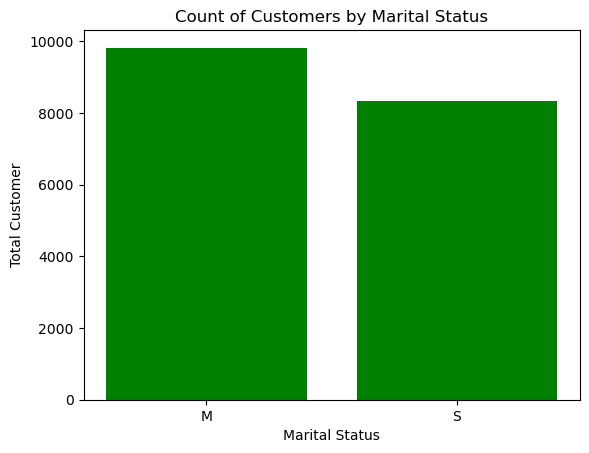

In [20]:
MS_bar = data.groupby("MaritalStatus")["MaritalStatus"].count()
#plt.figure(figsize=(6, 4))
plt.bar(MS_bar.index, MS_bar, color="green")
plt.xlabel("Marital Status")
plt.ylabel("Total Customer")
plt.title("Count of Customers by Marital Status")
plt.show()

### 2. Visualizing the Proportion of customers by Gender using Pie Chart

In [21]:
Gen_pie = data.groupby("Gender")["Gender"].count()

(-1.0999989853001066,
 1.0999999421464206,
 -1.0999997973168345,
 1.0999999703024814)

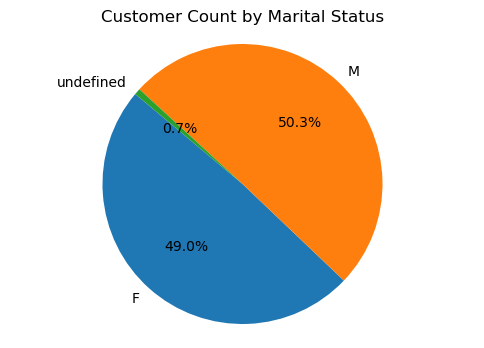

In [22]:
plt.figure(figsize=(6, 4))
plt.pie(Gen_pie, labels=Gen_pie.index, autopct='%1.1f%%', startangle=140)
plt.title("Customer Count by Marital Status")
plt.axis("equal")

In [23]:
#converting the AnnualIncome column to int
data["AnnualIncome"] = data["AnnualIncome"].astype(int)

### 3. Generate a histogram of AnnualIncome to examine its distribution

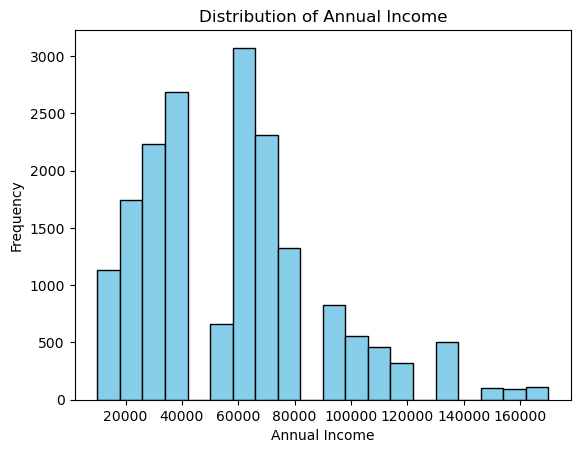

In [24]:
# Generate histogram
plt.hist(data['AnnualIncome'], color='skyblue', edgecolor='black', bins=20)

# Add labels and title
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income')

# Show plot
plt.show()

### 4. Createe a column chart displaying the average number of TotalChildren for each EducationalLevel

In [25]:
# Group by EducationalLevel and calculate the average number of TotalChildren
average_children = data.groupby('EducationLevel')['TotalChildren'].mean().reset_index()
average_children

,EducationLevel,TotalChildren
0,Bachelors,1.884243
1,Graduate Degree,1.906240
2,High School,1.947856
3,Partial College,1.748087
4,Partial High School,1.668167


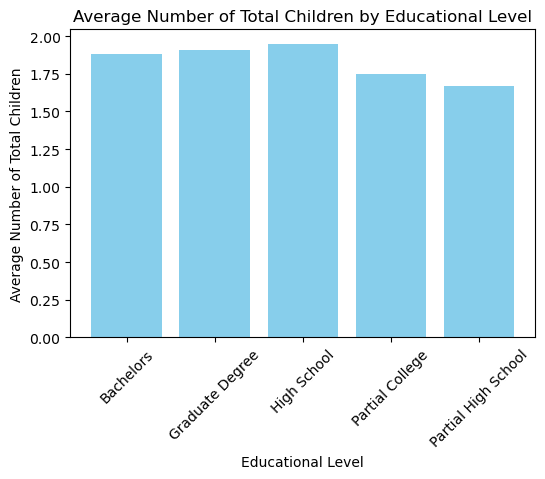

In [26]:
# Plotting the column chart
plt.figure(figsize=(6, 4))
plt.bar(average_children['EducationLevel'], average_children['TotalChildren'], color='skyblue')

# Adding labels and title
plt.xlabel('Educational Level')
plt.ylabel('Average Number of Total Children')
plt.title('Average Number of Total Children by Educational Level')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()

### 5. Use a bar chart to compare the average AnnualIncome across different Occupation categories.

In [27]:
# Group by Occupation and calculate the average AnnualIncome
average_income = data.groupby('Occupation')['AnnualIncome'].mean().reset_index()
average_income

,Occupation,AnnualIncome
0,Clerical,30696.047569
1,Management,92218.532049
2,Manual,16472.588185
3,Professional,74166.666667
4,Skilled Manual,51732.948234


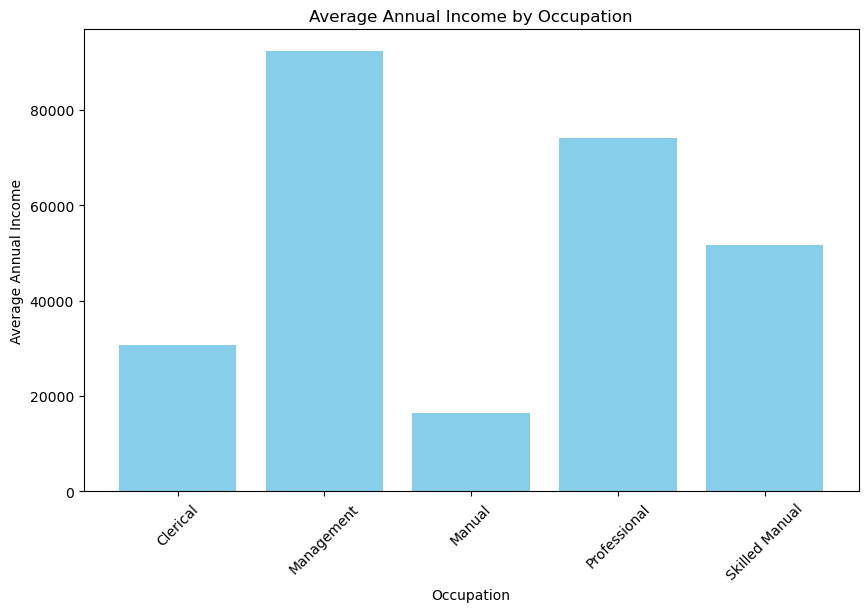

In [28]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_income['Occupation'], average_income['AnnualIncome'], color='skyblue')

# Adding labels and title
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Occupation')

# Rotating x-axis labels
plt.xticks(rotation=45)

# Show plot
plt.show()

### 6. Visualize the count of customers in each Occupation category using a pie chart.

In [29]:
# Count the number of customers in each Occupation category
occupation_counts = data['Occupation'].value_counts()
occupation_counts

Professional      5424
Skilled Manual    4501
Management        3011
Clerical          2859
Manual            2353
Name: Occupation, dtype: int64

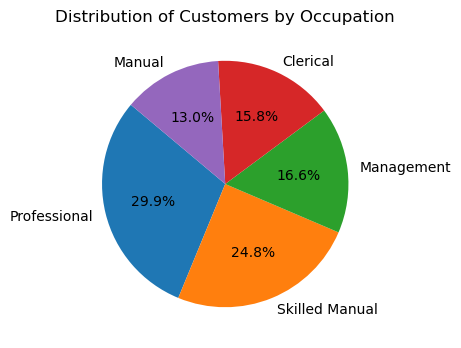

In [30]:
# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(occupation_counts, labels=occupation_counts.index, autopct='%1.1f%%', startangle=140)

# Adding title
plt.title('Distribution of Customers by Occupation')

# Show plot
plt.show()

### 7 Generate a histogram to explore the age distribution of customers

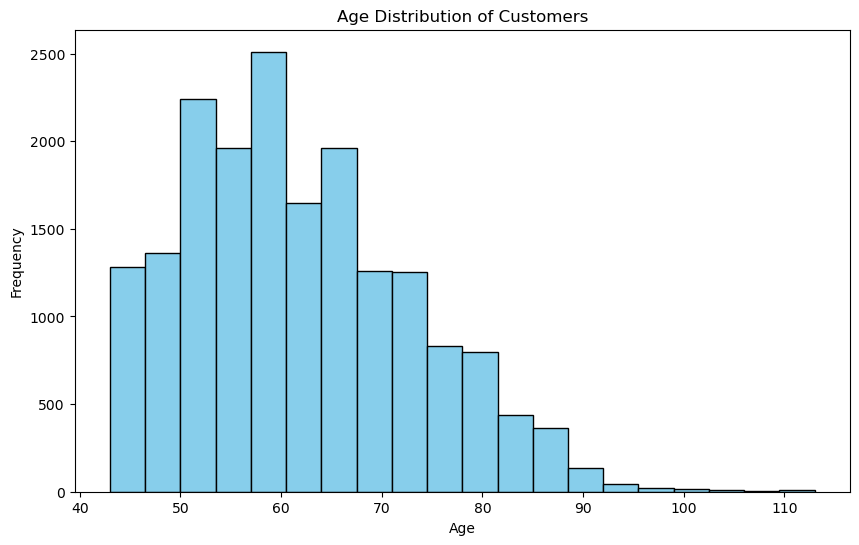

In [31]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')

# Show plot
plt.show()

### 8. Plot a line chart to show changes in the average AnnualIncome over different age groups.


In [32]:
data["Age"].unique()

array([ 57,  58,  56,  55,  59,  60,  45,  44,  79,  46,  78,  77,  76,
        75,  48,  74,  73,  43,  72,  71,  70,  69,  50,  47,  68,  67,
        66,  64,  61,  62,  63,  88,  85,  84,  82,  49,  51,  81,  80,
        65,  91,  90,  89,  87,  86,  83,  53,  54,  52,  93,  92,  97,
        99, 113,  94,  96,  95,  98, 101, 112, 111, 104, 103, 102, 107,
       110, 100, 106, 105, 108])

In [33]:
average_income_by_age = data.groupby('Age')['AnnualIncome'].mean()
average_income_by_age

Age
43     25024.875622
44     29322.580645
45     33178.294574
46     32701.298701
47     39658.536585
           ...     
108    20000.000000
110    20000.000000
111    15000.000000
112    15000.000000
113    10000.000000
Name: AnnualIncome, Length: 70, dtype: float64

In [34]:
data

,CustomerKey,Prefix,FirstName,LastName,Fullname,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age
0,11000,MR.,JON,YANG,MR. JON YANG,1966-04-08,M,M,jon24@learnsector.com,90000,2,Bachelors,Professional,Y,57
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,60000,3,Bachelors,Professional,N,58
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-08-12,M,M,ruben35@learnsector.com,60000,3,Bachelors,Professional,Y,58
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,70000,0,Bachelors,Professional,N,56
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Y,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18143,29479,MR.,TOMMY,TANG,MR. TOMMY TANG,1958-07-04,M,M,tommy2@learnsector.com,30000,1,Graduate Degree,Clerical,Y,65
18144,29480,MRS.,NINA,RAJI,MRS. NINA RAJI,1960-11-10,S,F,nina21@learnsector.com,30000,3,Graduate Degree,Clerical,Y,63
18145,29481,MR.,IVAN,SURI,MR. IVAN SURI,1960-01-05,S,M,ivan0@learnsector.com,30000,3,Graduate Degree,Clerical,N,64
18146,29482,MR.,CLAYTON,ZHANG,MR. CLAYTON ZHANG,1959-03-05,M,M,clayton0@learnsector.com,30000,3,Bachelors,Clerical,Y,65


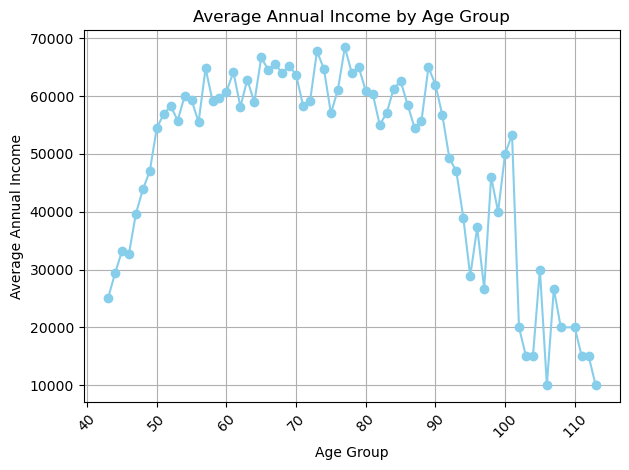

In [35]:

average_income_by_age.plot(marker='o', color='skyblue', linestyle='-')

# Adding labels and title
plt.xlabel('Age Group')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Age Group')

# Show plot
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
average_income_by_age = data.groupby("Age")["AnnualIncome"].mean().reset_index()
average_income_by_age

,Age,AnnualIncome
0,43,25024.875622
1,44,29322.580645
2,45,33178.294574
3,46,32701.298701
4,47,39658.536585
...,...,...
65,108,20000.000000
66,110,20000.000000
67,111,15000.000000
68,112,15000.000000


### 9. Create a bar chart that shows the number of homeowners vs. non-homeowners (HomeOwner status).

In [37]:
data.head(5)

,CustomerKey,Prefix,FirstName,LastName,Fullname,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner,Age
0,11000,MR.,JON,YANG,MR. JON YANG,1966-04-08,M,M,jon24@learnsector.com,90000,2,Bachelors,Professional,Y,57
1,11001,MR.,EUGENE,HUANG,MR. EUGENE HUANG,1965-05-14,S,M,eugene10@learnsector.com,60000,3,Bachelors,Professional,N,58
2,11002,MR.,RUBEN,TORRES,MR. RUBEN TORRES,1965-08-12,M,M,ruben35@learnsector.com,60000,3,Bachelors,Professional,Y,58
3,11003,MS.,CHRISTY,ZHU,MS. CHRISTY ZHU,1968-02-15,S,F,christy12@learnsector.com,70000,0,Bachelors,Professional,N,56
4,11004,MRS.,ELIZABETH,JOHNSON,MRS. ELIZABETH JOHNSON,1968-08-08,S,F,elizabeth5@learnsector.com,80000,5,Bachelors,Professional,Y,55


In [38]:
home_owner = data.groupby("HomeOwner")["HomeOwner"].count()
home_owner

HomeOwner
N     5888
Y    12260
Name: HomeOwner, dtype: int64

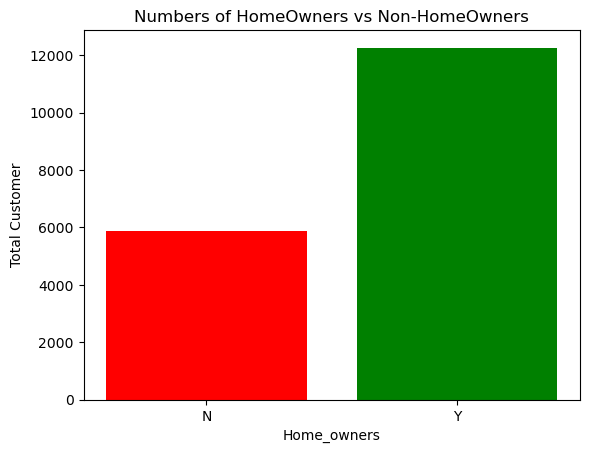

In [39]:
#plt.figure(figsize=(6, 4))
plt.bar(home_owner.index, home_owner, color=["Red","Green"])
plt.xlabel("Home_owners")
plt.ylabel("Total Customer")
plt.title("Numbers of HomeOwners vs Non-HomeOwners")
plt.show()

### 10. Use a column chart to display the total number of customers by EducationLevel.



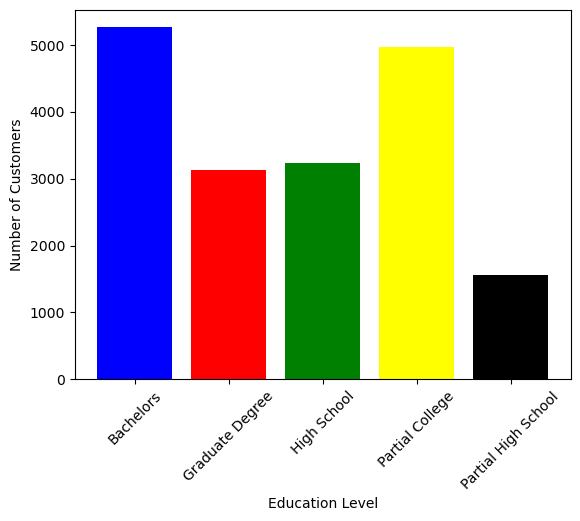

In [40]:
No_educationLevel = data.groupby("EducationLevel")["EducationLevel"].count()
No_educationLevel

plt.bar(No_educationLevel.index, No_educationLevel, color=["Blue","Red","Green","Yellow","Black"])
plt.xlabel("Education Level")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()

### 11. Visualize the distribution of TotalChildren using a histogram.


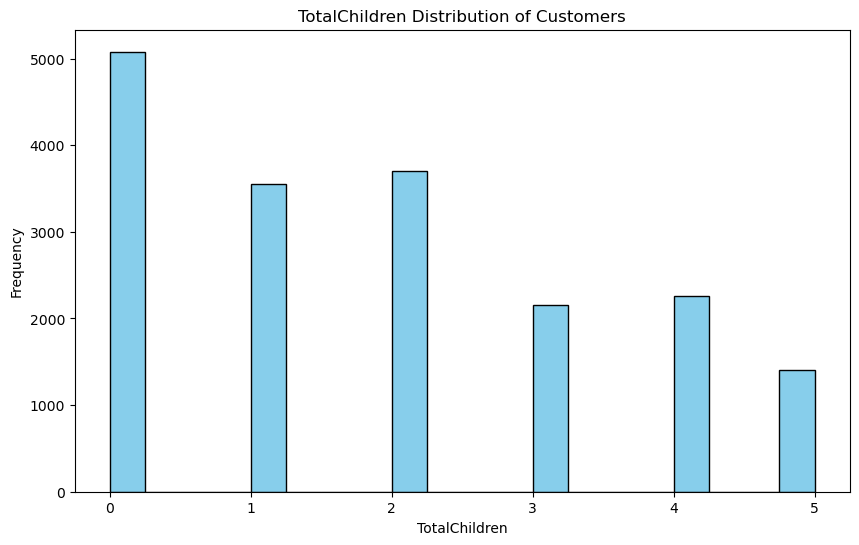

In [41]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['TotalChildren'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('TotalChildren')
plt.ylabel('Frequency')
plt.title('TotalChildren Distribution of Customers')

# Show plot
plt.show()

In [42]:
data.groupby("TotalChildren")["TotalChildren"].count()

TotalChildren
0    5080
1    3552
2    3703
3    2153
4    2259
5    1401
Name: TotalChildren, dtype: int64

### 12. Create a pie chart showing the proportion of different MaritalStatus categories within a specific Occupation.


In [43]:
# Get unique occupations from the DataFrame
unique_occupations = data['Occupation'].unique()
unique_occupations

array(['Professional', 'Management', 'Skilled Manual', 'Clerical',
       'Manual'], dtype=object)

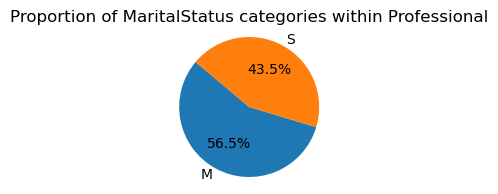

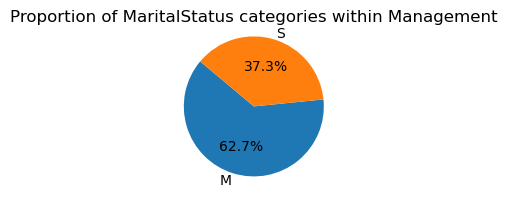

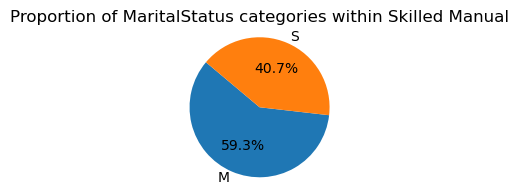

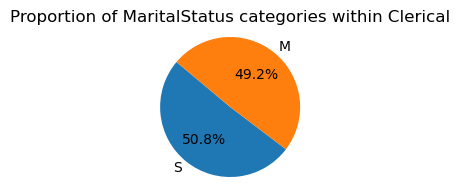

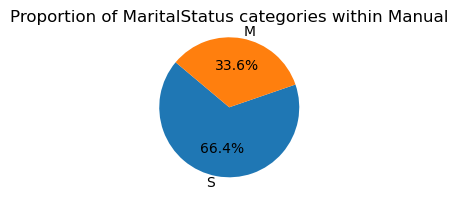

In [44]:
# Plot pie charts for each occupation
for occupation in unique_occupations:
    # Filter the DataFrame for the specific occupation
    filtered_data = data[data['Occupation'] == occupation]
    
    # Count the occurrences of each MaritalStatus category with the occupation 
    status_counts = filtered_data['MaritalStatus'].value_counts()
    
    # Plot the pie chart
    plt.figure(figsize=(4, 2))
    plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
    
    # Add title
    plt.title('Proportion of MaritalStatus categories within {}'.format(occupation))
    
    # Display the plot
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

### 13. Plot a bar chart comparing the count of male vs. female customers in each EducationLevel.

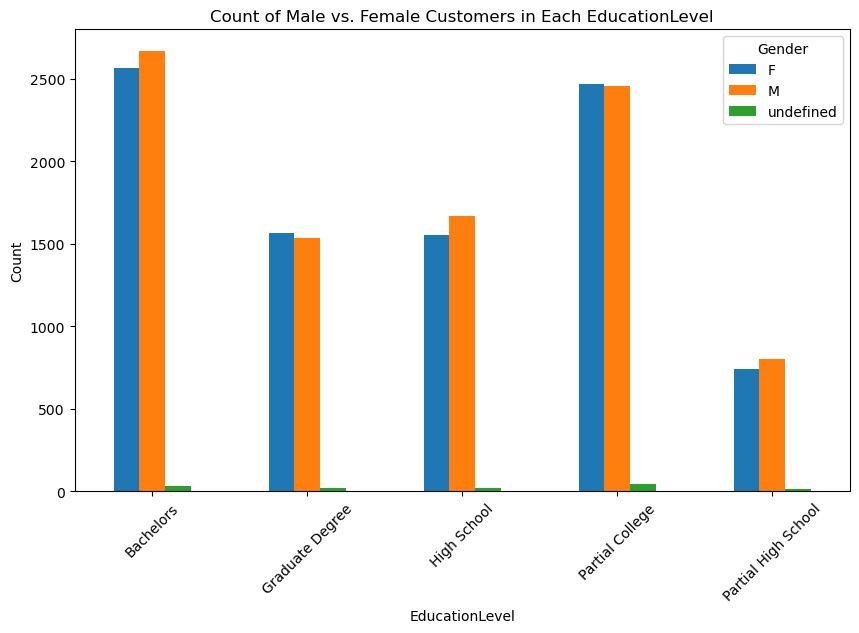

In [45]:
# Grouping by EducationLevel and Gender, and counting occurrences
grouped_counts = data.groupby(['EducationLevel', 'Gender']).size().unstack()
grouped_counts

# Plotting the bar chart
grouped_counts.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Count of Male vs. Female Customers in Each EducationLevel')
plt.xlabel('EducationLevel')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Gender')
plt.show()

### 14. Use a line chart to depict the average number of TotalChildren across different income ranges.

In [46]:
#Grouping by IncomeRange and calculating the average TotalChildren
average_children = data.groupby('AnnualIncome')['TotalChildren'].mean()
average_children

AnnualIncome
10000     1.623789
20000     1.281948
30000     1.344812
40000     1.280134
50000     1.585477
60000     1.802083
70000     2.669693
80000     2.912453
90000     2.593976
100000    1.586762
110000    1.762527
120000    2.194444
130000    2.283433
150000    2.200000
160000    1.967033
170000    1.917431
Name: TotalChildren, dtype: float64

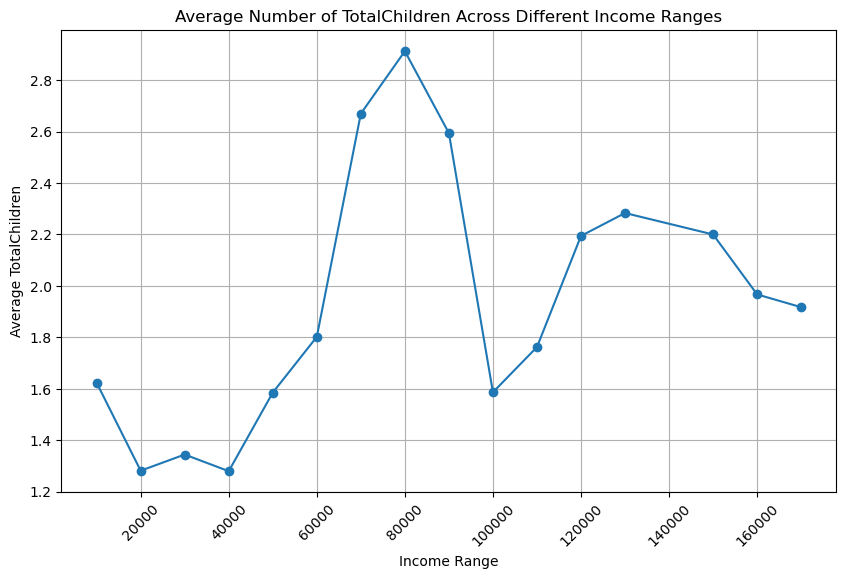

In [47]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(average_children.index, average_children.values, marker='o', linestyle='-')

# Adding title and labels
plt.title('Average Number of TotalChildren Across Different Income Ranges')
plt.xlabel('Income Range')
plt.ylabel('Average TotalChildren')

# Display the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)  # Add gridlines
plt.show()


### 15. Generate a column chart that illustrates the count of customers by HomeOwner status for each MaritalStatus

In [48]:
# Grouping by MaritalStatus and HomeOwnerStatus and counting occurrences
grouped_counts = data.groupby(['MaritalStatus', 'HomeOwner']).size().unstack()
grouped_counts

HomeOwner,N,Y
MaritalStatus,,
M,1816,8001
S,4072,4259


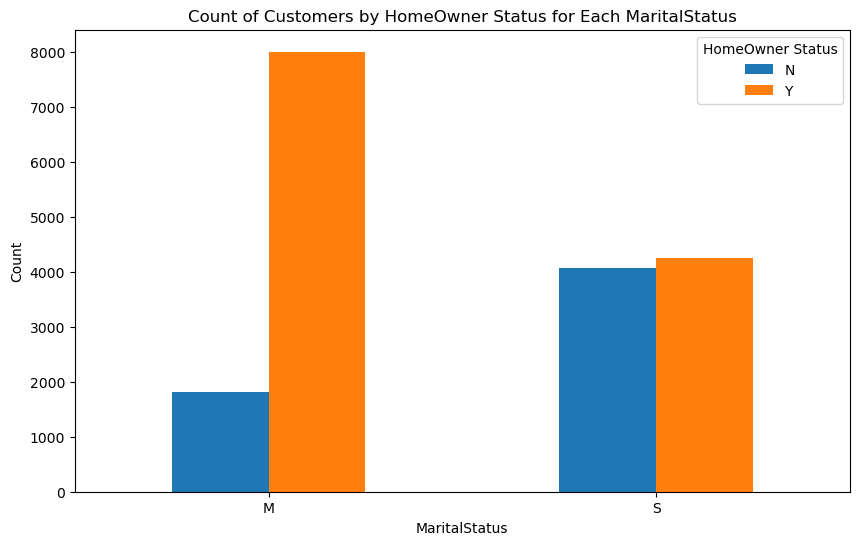

In [49]:
# Plotting the column chart
grouped_counts.plot(kind='bar', figsize=(10, 6))

# Adding title and labels
plt.title('Count of Customers by HomeOwner Status for Each MaritalStatus')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')

# Display the plot
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='HomeOwner Status')
plt.show()

### 16. Visualize the distribution of customers' birth months using a bar chart (Extract month from BirthDate).

In [50]:
#creating the birth month column of the customers

data["Month"] = data.BirthDate.dt.month


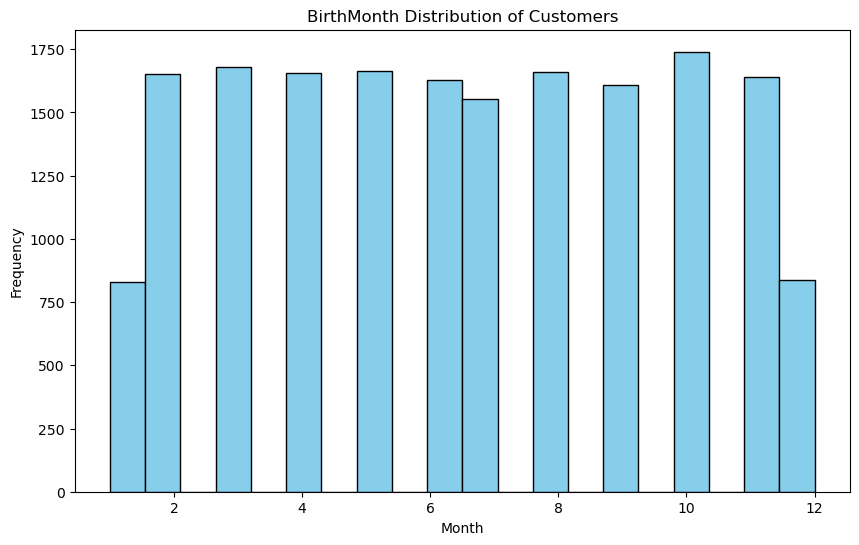

In [51]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(data['Month'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('BirthMonth Distribution of Customers')

# Show plot
plt.show()

### 17. Create a pie chart to represent the proportion of customers by Occupation within a specific income range.


In [99]:
occupation_counts = data['Occupation'].value_counts()
occupation_counts

Professional      5424
Skilled Manual    4501
Management        3011
Clerical          2859
Manual            2353
Name: Occupation, dtype: int64

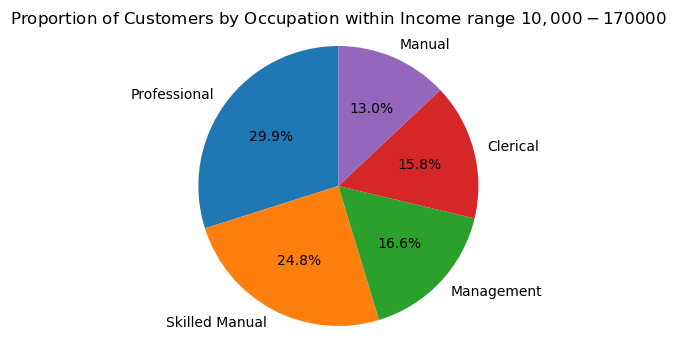

In [59]:
# Get unique values of AnnualIncome
unique_incomes = data['AnnualIncome'].unique()
unique_incomes

# finding the minimum and maximum annual income
min_income = data['AnnualIncome'].min()
max_income = data['AnnualIncome'].max()

#filter data based oj income range
filt_data = data[(data['AnnualIncome'] >= min_income) & (data['AnnualIncome'] <= max_income)]
filt_data

#calculate proportion of customers by occupation
occupation_counts = filt_data["Occupation"].value_counts(normalize=True)
occupation_counts

#plot the pie chart
plt.figure(figsize=(6,4))
occupation_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Proportion of Customers by Occupation within Income range $10,000 - $170000")
plt.ylabel("") # no need to label the y-axis
plt.axis("equal") #Equal aspect ratio ensures that pie drawn as a circle.
plt.show()

### 18. Use a bar chart to show the frequency of each EducationLevel category.

In [94]:
# Count of the occurrences of each EducationLevel category
education_level_counts = data['EducationLevel'].value_counts()
education_level_counts

Bachelors              5261
Partial College        4966
High School            3241
Graduate Degree        3125
Partial High School    1555
Name: EducationLevel, dtype: int64

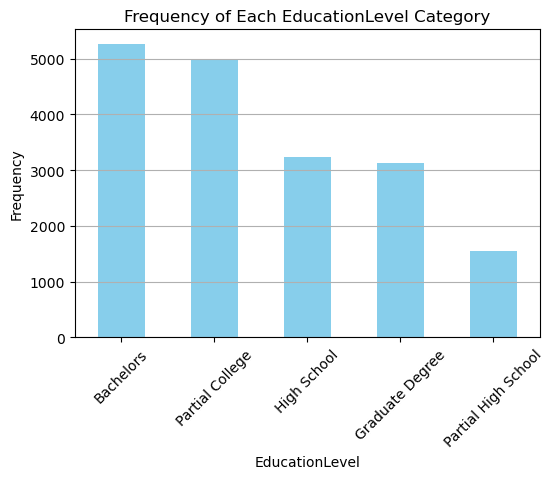

In [98]:
# Ploting the bar chart
plt.figure(figsize=(6, 4))
education_level_counts.plot(kind='bar', color='skyblue')

# title and labels
plt.title('Frequency of Each EducationLevel Category')
plt.xlabel('EducationLevel')
plt.ylabel('Frequency')

#plotting
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines
plt.show()